# Prikazovanje podatkov - napredno

## Improving Plot Aesthetics

In the Exploratory Data Visualization course, we learned how to use visualizations to explore and understand data. Because we were focused on exploring trends and getting familiar with the data, we didn't focus much on tweaking the appearance of the plots to make them more presentable to others. We instead focused on the workflow of quickly creating, tweaking, displaying, and iterating on plots.

In this course, we'll focus on how to use data visualization to communicate insights and tell stories. In this mission, we'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand. Along the way, we'll introduce the principles that informed those changes and provide a framework for you to apply them in the future.

### Introduction To The Data

<div><p><a target="_blank" href="http://nces.ed.gov/programs/digest/2013menu_tables.asp">The Department of Education Statistics</a> releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012.  The data set is broken up into 17 categories of degrees, with each column as a separate category.</p>
<p>Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website.  You can download the dataset Randal compiled <a target="_blank" href="http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv">here</a>.  </p>



<p>Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics.  This gap is reported on often <a target="_blank" href="https://www.google.com/search?hl=en&amp;gl=us&amp;tbm=nws&amp;authuser=0&amp;q=gender+gap+stem&amp;oq=gender+gap+stem&amp;gs_l=news">in the news</a> and <a target="_blank" href="http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/">not everyone agrees</a> that there is a gap.</p>
<p>In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization.  Let's first generate a standard matplotlib plot.</p></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

In [3]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


> - Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women:
    - Set the x-axis to the Year column from women_degrees.
    - Set the y-axis to the Biology column from women_degrees.
- Display the plot.

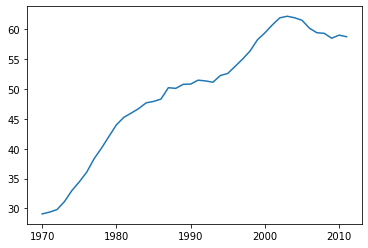

In [4]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

<div><p>From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's.  We can also tell that the percentage has stayed above 50% since around 1987.  While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story.  If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.</p>
<p>If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender.  We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the <code>Biology</code> column from <code>100</code>.  Once we have the male percentages, we can generate two line charts as part of the same diagram.</p>
<p>Let's now create a diagram containing both the line charts we just described.</p></div>

> - Generate 2 line charts on the same figure:
    - One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
    - One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
- Set the title of the chart to "Percentage of Biology Degrees Awarded By Gender".
- Generate a legend and place it in the "upper right" location.
- Display the chart.

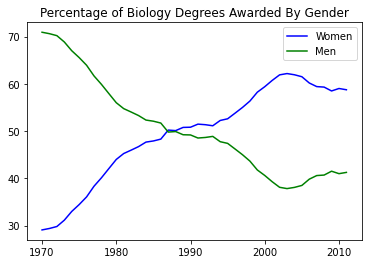

In [5]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### Data-Ink Ratio

<div><p>The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages.  This plot instead tells the story of two distinct periods.  In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority.  You can see the point where women overtook men where the lines intersect.  While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.</p>
<p>Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time.  These excess elements, sometimes known as <a target="_blank" href="https://en.wikipedia.org/wiki/Chartjunk"><strong>chartjunk</strong></a>, increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts.  In general, we want to maximize the <a target="_blank" href="https://infovis-wiki.net/wiki/Data-Ink_Ratio"><strong>data-ink ratio</strong></a>, which is the fractional amount of the plotting area dedicated to displaying the data.  </p>
<p>The following is an animated GIF by <a target="_blank" href="https://www.darkhorseanalytics.com/blog/data-looks-better-naked">Darkhorse Analytics</a> that shows a series of tweaks for boosting the data-ink ratio:</p>
<p><img alt="Darkhorse Analytics GIF" src="images/data-ink.gif"></p>
<p>Non-data ink includes any elements in the chart that don't directly display data points.  This includes tick markers, tick labels, and legends.  Data ink includes any elements that display and depend on the data points underlying the chart.  In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers.  As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots.  We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the <em>wrong</em> story.</p>
<p>This principle was originally set forth by <a target="_blank" href="https://en.wikipedia.org/wiki/Edward_Tufte">Edward Tufte</a>, a pioneer of the field of data visualization.  Tufte's first book, <a target="_blank" href="https://www.edwardtufte.com/tufte/books_vdqi"><em>The Visual Display of Quantitative Information</em></a>, is considered a bible among information designers.  We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.</p>
<p>To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:</p>
<ul>
<li>Remove all of the axis tick marks.</li>
<li>Hide the spines, which are the lines that connects the tick marks, on each axis.</li>
</ul></div>

### Hiding Tick Marks

<div><p>To customize the appearance of the ticks, we use the <a target="_blank" href="http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params">Axes.tick_params()</a> method.  Using this method, we can modify which tick marks and tick labels are displayed.  By default, matplotlib displays the tick marks on all four sides of the plot.  Here are the four sides for a standard line chart:</p>
<ul>
<li>The left side is the y-axis.</li>
<li>The bottom side is the x-axis.</li>
<li>The top side is across from the x-axis.</li>
<li>The right side is across from the y-axis.</li>
</ul>
<p>The parameters for enabling or disabling tick marks are conveniently named after the sides.  To hide all of them, we need to pass in the following values for each parameter when we call <code>Axes.tick_params()</code>:</p>
<ul>
<li><code>bottom</code>: <code>False</code></li>
<li><code>top</code>: <code>False</code></li>
<li><code>left</code>: <code>False</code></li>
<li><code>right</code>: <code>False</code></li>
</ul></div>

> - Generate 2 line chart in the same plotting area:
    - One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
    - One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
- Remove all of the tick marks.
- Set the title of the plot to "Percentage of Biology Degrees Awarded By Gender".
- Generate a legend and place it in the "upper right" location.
- Display the chart.

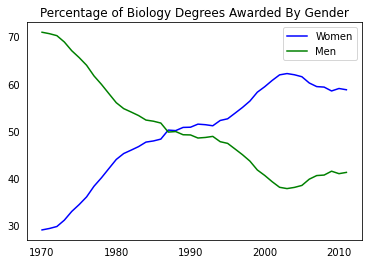

In [6]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'],c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')

ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### Hiding Spines

<div><p>With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner.  In addition, the spines in the chart now are no longer necessary.  When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges.  When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way.  As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart.  By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.</p>
<p>In matplotlib, the spines are represented using the <a target="_blank" href="http://matplotlib.org/api/spines_api.html">matplotlib.spines.Spine</a> class.  When we create an Axes instance, four Spine objects are created for us.  If you run <code>print(ax.spines)</code>, you'll get back a dictionary of the Spine objects:</p>
</div>

In [7]:
print(ax.spines)

<div>
<p>To hide all of the spines, we need to:</p>
<ul>
<li>access each Spine object in the dictionary</li>
<li>call the <code>Spine.set_visible()</code> method</li>
<li>pass in the Boolean value <code>False</code></li>
</ul>
<p>The following line of code removes the spines for the right axis:</p>
</div>

    ax.spines["right"].set_visible(False)

> - Generate 2 line charts on the same plotting area:
    - One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
    - One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
- Remove all of the axis tick marks.
- Hide all of the spines.
- Set the title of the plot to "Percentage of Biology Degrees Awarded By Gender".
- Generate a legend and place it in the "upper right" location.
- Display the chart.

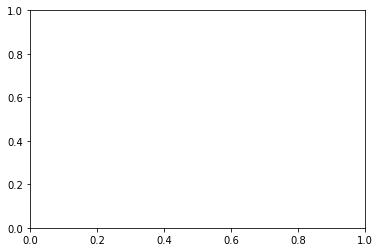

In [8]:
fig, ax = plt.subplots()
ax.spines

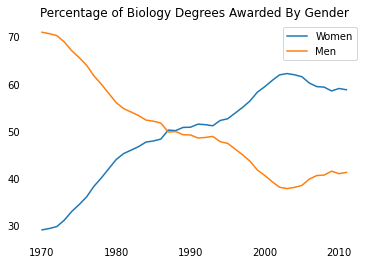

In [9]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### Comparing data with multiple plots

<div><p>So far, matplotlib has set the limits automatically for each axis and this hasn't had any negative effect on communicating our story with data. If we want to generate charts to compare multiple degree categories, the axis ranges need to be consistent. Inconsistent data ranges can distort the story our charts are telling and fool the viewer.</p>
<p>Edward Tufte often preaches that a good chart encourages comparison over just description.  A good chart uses a consistent style for the elements that aren't directly conveying the data points.  These elements are part of the non-data ink in the chart.  By keeping the non-data ink as consistent as possible across multiple plots, differences in those elements stick out easily to the viewer.  This is because our visual processing systems are excellent at discerning differences quickly and brings them to the front of our thought process.  The similarities naturally fade to the back of our thought process.</p>
<p>Let's generate line charts for four STEM degree categories on a grid to encourage comparison.  Our instructions for generating the chart are cumbersome.  Here's what the final chart looks like, so you can refer to it as you write your code:</p>
<p><img alt="Four Major Categories" src="images/four_major_categories_plots.png"></p>
<p>We've also added some starter code to help you generate the chart.  This code uses a for loop to generate the line charts for each subplot in the chart.  We can save space this way and easily tweak the code to generate other variations of the chart.</p></div>

> - Generate a line chart using the women and men percentages for Biology in the top left subplot.
- Generate a line chart using the women and men percentages for Computer Science in the top right subplot.
- Generate a line chart using the women and men percentages for Engineering in the bottom left subplot.
- Generate a line chart using the women and men percentages for Math and Statistics in the bottom right subplot.
- For all subplots:
    - For the line chart visualizing female percentages, set the line color to "blue" and the label to "Women".
    - For the line chart visualizing male percentages, set the line color to "green" and the label to "Men".
    - Set the x-axis limit to range from 1968 to 2011.
    - Set the y-axis limit to range from 0 to 100.
    - Hide all of the spines and tick marks.
    - Set the title of each subplot to the name of the major category (e.g. "Biology", "Computer Science").
- Place a legend in the upper right corner of the bottom right subplot.
- Display the plot.

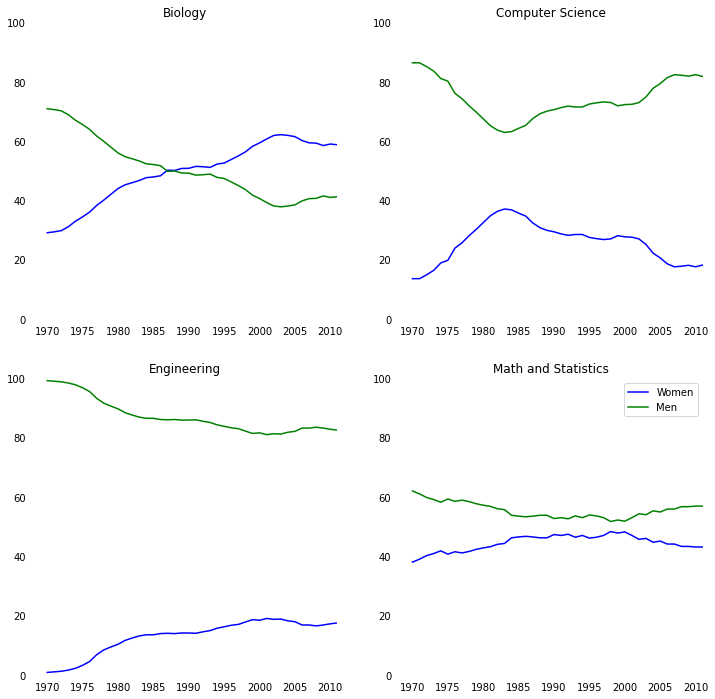

In [10]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced.

## Color, Layout, and Annotations

### Color

<div><p>So far, we've been using the <a target="_blank" href="http://matplotlib.org/api/colors_api.html#module-matplotlib.colors">default matplotlib colors</a> to color the lines in line charts.  When selecting colors, we need to be mindful of people who have some amount of color blindness.  People who have <a target="_blank" href="https://en.wikipedia.org/wiki/Color_blindness">color blindness</a> have a decreased ability to distinguish between certain kinds of colors.   The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades.  Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.</p>
<p>The <a target="_blank" href="https://en.wikipedia.org/wiki/Ishihara_test">Ishihara test</a> is a well known test for color blindness, where the person is asked to identify the number in the following image:</p>
<p><img alt="Ishihara color test plate" src="images/ishihara_test.png"></p>
<p>People with complete color vision can observe the number <strong>74</strong>.  Some with partial color blindness see the number <strong>21</strong> instead and those with full color blindness can't see any number at all.</p>
<p>If we wanted to publish the data visualizations we create, we need to be mindful of color blindness.  Thankfully, there are color palettes we can use that are friendly for people with color blindness.  One of them is called <strong>Color Blind 10</strong> and was released by Tableau, the company that makes the data visualization platform of the same name.  Navigate to <a target="_blank" href="http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html">this page</a> and select just the <strong>Color Blind 10</strong> option from the list of palettes to see the ten colors included in the palette.</p></div>

### Setting Line Color Using RGB

<div><p>The Color Blind 10 palette contains ten colors that are colorblind friendly.  Let's use the first two colors in the palette for the line colors in our charts.  You'll notice that next to each color strip are three integer values, separated by periods (<code>.</code>):</p>
<p><img alt="Tableau RGB values" src="images/tableau_rgb_values.png"></p>
<p>These numbers represent the <strong>RGB values</strong> for each color.  The <a target="_blank" href="https://en.wikipedia.org/wiki/RGB_color_model">RGB color model</a> describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color.  The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively.  In computers, each RGB value can range between 0 and 255.  This is because 256 integer values can be represented using 8 bits.  You can read more about 8-bit color <a target="_blank" href="https://en.wikipedia.org/wiki/8-bit_color">here</a>.</p>
<p>The first color in the palette is a color that resembles dark blue and has the following RGB values:</p>
<ul>
<li>Red: <code>0</code></li>
<li>Green: <code>107</code></li>
<li>Blue: <code>164</code></li>
</ul>
<p>To specify a line color using RGB values, we pass in a tuple of the values to the <code>c</code> parameter when we generate the line chart.  Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).  In the following code, we scale the first color, which resembles dark blue, in the Color Blind 10 palette and set it as the line color:</p>
</div>

```python
cb_dark_blue = (0/255,107/255,164/255)
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue)
```

> - Modify the starter code to:
    - Set the line color for the line charts visualizing women percentages to the dark blue color from the Color Blind 10 palette (RGB value of (0, 107, 164)).
    - Set the line color for the line charts visualizing men percentages to the orange color from the Color Blind 10 palette (RGB value of (255, 128, 14)).
- Display the figure after you've made these changes.

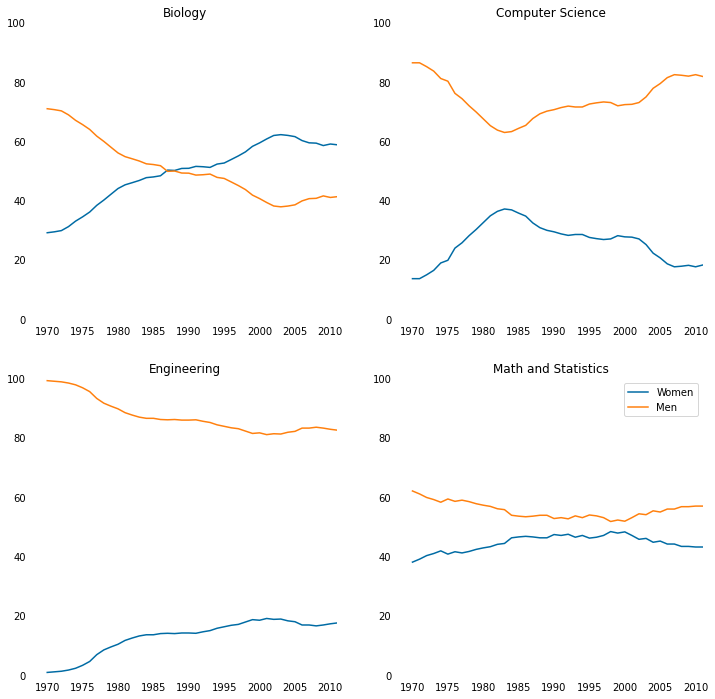

In [11]:
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    cb_dark_blue = (0/255, 107/255, 164/255)
    cb_orange = (255/255, 128/255,14/255)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

### Setting Line Width

<div><p>By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin.  The white color in the blank area in the line charts is still a dominating color.  To emphasize the lines in the plots, we can increase the width of each line.  Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.</p>
<p>When we call the <code>Axes.plot()</code> method, we can use the <code>linewidth</code> parameter to specify the line width.  Matplotlib expects a float value for this parameter:</p>
</div>


```python
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women', c=cb_dark_blue, linewidth=2)
```

The higher the line width, the thicker each line will be.

> Modify the starter code to set the line widths for both line charts to 3.

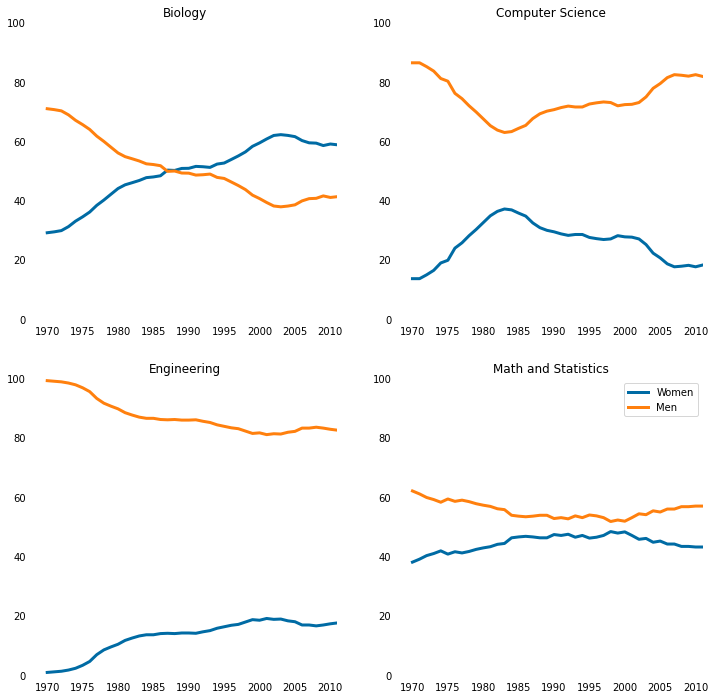

In [12]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], linewidth=3, c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], linewidth=3, c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

### Improve the Layout and Ordering

<div><p>So far, we've been generating our line charts on a 2 by 2 subplot grid.  If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row.  Unfortunately, neither solution orders the plots in a beneficial way to the viewer.  By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.</p>
<p>To make the viewing experience more coherent, we can:</p>
<ul>
<li>use layout of a single row with multiple columns</li>
<li>order the plots in decreasing order of initial gender gap</li>
</ul>
<p>Here's what that would look like:</p>
<p><img alt="Line Charts Ordered By Decreasing Initial Gender Gap" src="images/line_charts_dec_initial_gg.png"></p>
<p>The leftmost plot has the largest gender gap in 1968 while the rightmost plot has the smallest gender gap in 1968.  If we're instead interested in the recent gender gaps in STEM degrees, we can order the plots from largest to smallest ending gender gaps.  Here's what that would look like:</p>
<p><img alt="Line Charts Ordered By Decreasing Ending Gender Gap" src="images/line_charts_dec_ending_gg.png"></p>
<p>In this exercise, you'll order the charts by decreasing ending gender gap.  We've populated the list <code>stem_cats</code> with the six STEM degree categories, ordering them by decreasing ending gender gap.  In the next step, we'll explore how we can replace the legend, which is currently overlapping with the rightmost line chart.</p></div>

> - Modify the starter code to:
    - Change the width of the figure to a width of 18 inches and a height of 3 inches.
    - In the for loop, change the range to (0,6) instead of (0,4).
    - Change the subplot layout from 2 rows by 2 columns to 1 row by 6 columns.
    - Use stem_cats instead of major_cats when generating and setting the titles for the line charts.

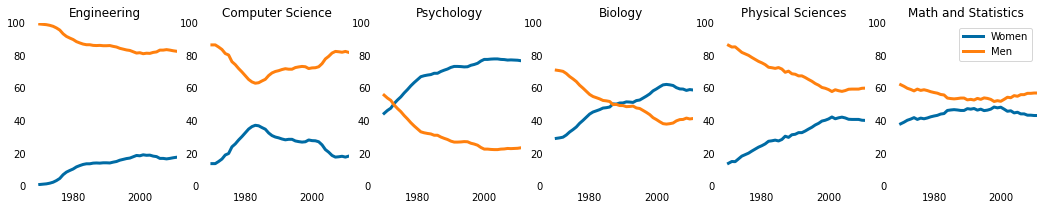

In [13]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

### Replacing the Legend With Annotations

<div><p>The purpose of a legend is to ascribe meaning to symbols or colors in a chart.  We're using it to inform the viewer of what gender corresponds to each color.  Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way.  Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).</p>
<p>Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:</p>
<p><img alt="Annotated Legend" src="images/annotated_legend.png"></p>
<p>If you notice, even the position of the text annotations have meaning.  In both plots, the annotation for <code>Men</code> is positioned above the orange line while the annotation for <code>Women</code> is positioned below the dark blue line.  This positioning subtly suggests that men are a majority for the degree categories the line charts are representing (<code>Engineering</code> and <code>Math and Statistics</code>) and women are a minority for those degree categories.</p>
<p>Combined, these two observations suggest that we should stick with annotating just the leftmost and the rightmost line charts, prioritizing the data-ink ratio over the consistency of elements.</p></div>

<div><p>To add text annotations to a matplotlib plot, we use the <a target="_blank" href="http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.text">Axes.text()</a> method.  This method has a few required parameters:</p>
<ul>
<li><code>x</code>: x-axis coordinate (as a float)</li>
<li><code>y</code>: y-axis coordinate (as a float)</li>
<li><code>s</code>: the text we want in the annotation (as a string value)</li>
</ul>
<p>The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis.  If we want to add text at the intersection of <code>1970</code> from the x-axis and <code>0</code> from the y-axis, we would pass in those values:</p>
</div>

    ax.text(1970, 0, "starting point")

> - Add the following text annotations in the leftmost chart:
    - The string "Men" at the x-axis coordinate of 2005 and the y-axis coordinate of 87.
    - The string "Women" at the x-axis coordinate of 2002 and the y-axis coordinate of 8.
- Add the following text annotations in the rightmost chart:
    - The string "Men" at the x-axis coordinate of 2005 and the y-axis coordinate of 62.
    - The string "Women" at the x-axis coordinate of 2001 and the y-axis coordinate of 35.
- Remove the legend.


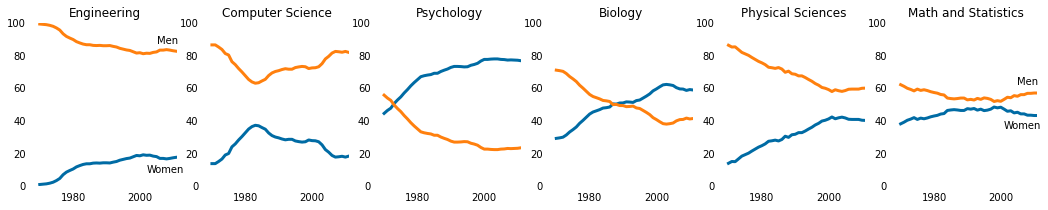

In [14]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
    
plt.show()

## Visualization with pandas

In [15]:
import pandas as pd

In [16]:
oecd = pd.read_csv('data/OECD_data.csv')
# oecd.info()
# oecd.head()

columns_to_drop = ['INDICATOR', 'SUBJECT','FREQUENCY','MEASURE', 'Flag Codes']
oecd.drop(columns=columns_to_drop, inplace=True)

#oecd['TIME'] = pd.to_datetime(oecd['TIME'])

In [17]:
oecd.head()

,LOCATION,TIME,Value
0,AUS,1967,1.875
1,AUS,1968,1.850
2,AUS,1969,1.800
3,AUS,1970,1.625
4,AUS,1971,1.925


### df.plot

[Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting)

Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion.

When you use .plot on a dataframe, you sometimes pass things to it and sometimes you don’t.

- `.plot` plots the index against every column
- `.plot(x='col1')` plots against a single specific column
- `.plot(x='col1', y='col2')` plots one specific column against another specific column


### Plotting Version 1: .plot plots the index against every column

Let’s look at a slice somewhere in the middle of our data. It’s nothing very exciting, just countries and years and unemployment rates.

In [18]:
oecd[35:40]

,LOCATION,TIME,Value
35,AUS,2002,6.368911
36,AUS,2003,5.928420
37,AUS,2004,5.396734
38,AUS,2005,5.033881
39,AUS,2006,4.785240


See the column on the far left? That’s the index. In this case, it’s just the number of the row. First row is index 0, 40th row is index 39, etc.

If we graph using just .plot, it’s going to use this row number as the X axis on our chart. What will that look like?

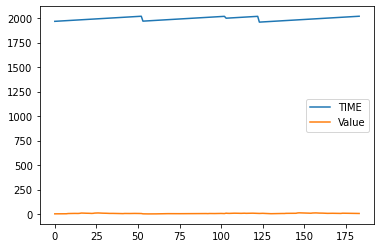

In [19]:
oecd.plot()
plt.show()

Weird, right? The x axis is just “hey, this is the 20th row, this is the 40th row, this is the 140th row” - nothing actually important. See where the little dips are in the blue line?

It’s also plotting both the unemployment and the year. What a wreck!

The major use cases for .plot() is when you have a meaningful index, which usually happens in two situations:
- You’ve just done a .value_counts() or a .groupby()
- You’ve used .set_index, probably with dates

Let’s take a look at how that works.

In [20]:
oecd.groupby('LOCATION')['Value'].mean()

LOCATION
AUS    6.002425
AUT    3.641595
BEL    7.727318
CAN    7.408743
Name: Value, dtype: float64

When you do a groupby and summarize a column, you get a Series, not a dataframe. The important thing is to look at the data on the left - the index - and realize that this time it means something! It’s a country’s name! And in terms of “other” rows, there’s only one - the average unemployment rate. So if we plot it…

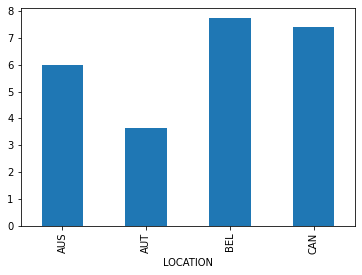

In [21]:
oecd.groupby('LOCATION')['Value'].mean().plot(kind='bar')
plt.show()

#### Plotting Version 2: .plot(x='col1') plots against a single specific column

Več o tem v naslednjem poglaviju.

#### Plotting Version 3: .plot(x='col1', y='col2') plots one specific column against another specific column

We know what we want, though - we want the year on the x axis and the unemployment rate on the y axis. If we give .plot both an x= and a y= we’ll be able to take care of that, right?

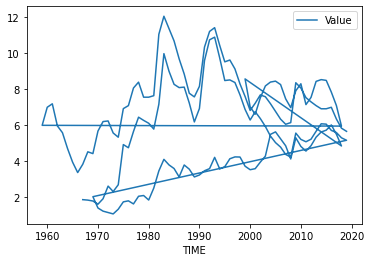

In [22]:
oecd.plot(x='TIME', y='Value')
plt.show()

When pandas plots, it assumes every single data point should be connected, aka pandas has no idea that we don’t want row 36 (Australia in 2016) to connect to row 37 (USA in 1980). In order to fix that, we just need to add in a groupby. Once we’ve grouped the data together by country, pandas will plot each group separately.

In [23]:
#oecd.groupby('LOCATION').plot(x='TIME', y='Value')
#plt.show()

Oh boy, maybe that was a little too separately! We’ll talk about this more when we discuss matplotlib-y stuff like figures, axes and subplots, but the basic idea is first we need to create a graph, and then we’ll tell pandas to keep drawing on top of the same graph for every single chart.

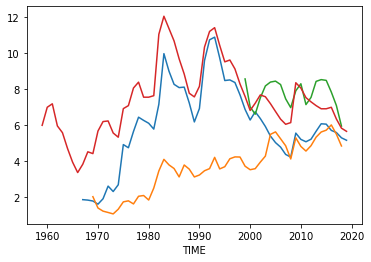

In [24]:
fig, ax = plt.subplots()
oecd.groupby('LOCATION').plot(x='TIME', y='Value', ax=ax, legend=False)
plt.show()

Overall, you just need to know if you have a meaningful index.
- Did you do a groupby or value_counts()? You can use .plot()
- Do you have a normal dataframe? You should probably set x and y.

## Seaborn

### Introduction to Seaborn

<div><p>So far, we've mostly worked with plots that are quick to analyze and make sense of.  Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader.  We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization.  In this mission, we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.</p>
<p>We'll be working with the <a target="_blank" href="http://seaborn.pydata.org/">seaborn</a> visualization library, which is built on top of matplotlib.  Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:</p>
<p><img alt="Seaborn Gallery" src="images/seaborn_gallery.png"></p>
<p>Before we dive into seaborn, let's understand the data set we'll be working with in this mission.</p></div>

### Introduction to the Data Set

<div><p>We'll be working with a data set of the passengers of the Titanic.  The <a target="_blank" href="https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic">Titanic shipwreck</a> is the most famous shipwreck in history and led to the creation of better safety regulations for ships.  One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.</p>
<p>The data set was compiled by Kaggle for their introductory data science competition, called <strong>Titanic: Machine Learning from Disaster</strong>.  The goal of the competition is to build machine learning models that can 
predict if a passenger survives from their attributes.  You can download the data set by navigating to the <a target="_blank" href="https://www.kaggle.com/c/titanic/data">data download page</a> for the competition and creating a free account.</p>
<p>The data for the passengers is contained in two files:</p>
<ul>
<li><code>train.csv</code>: Contains data on 712 passengers</li>
<li><code>test.csv</code>: Contains data on 418 passengers</li>
</ul>
<p>Each row in both data sets represents a passenger on the Titanic, and some information about them.  We'll be working with the <code>train.csv</code> file, because the <code>Survived</code> column, which describes if a given passenger survived the crash, is preserved in the file.  The column was removed in <code>test.csv</code>, to encourage competitors to practice making predictions using the data.  Here are descriptions for each of the columns in <code>train.csv</code>:</p>
<ul>
<li><code>PassengerId</code> -- A numerical id assigned to each passenger.  </li>
<li><code>Survived</code> -- Whether the passenger survived (<code>1</code>), or didn't (<code>0</code>).</li>
<li><code>Pclass</code> -- The class the passenger was in.</li>
<li><code>Name</code> -- the name of the passenger.</li>
<li><code>Sex</code> --  The gender of the passenger -- male or female.</li>
<li><code>Age</code> -- The age of the passenger.  Fractional.</li>
<li><code>SibSp</code> -- The number of siblings and spouses the passenger had on board.</li>
<li><code>Parch</code> -- The number of parents and children the passenger had on board.</li>
<li><code>Ticket</code> -- The ticket number of the passenger.</li>
<li><code>Fare</code> -- How much the passenger paid for the ticket.</li>
<li><code>Cabin</code> -- Which cabin the passenger was in.</li>
<li><code>Embarked</code> -- Where the passenger boarded the Titanic.</li>
</ul>
<p>Here's what the first few rows look like:</p>


<table>
<tbody><tr>
<th>PassengerId</th>
<th>Survived</th>
<th>Pclass</th>
<th>Name</th>
<th>Sex</th>
<th>Age</th>
<th>SibSp</th>
<th>Parch</th>
<th>Ticket</th>
<th>Fare</th>
<th>Cabin</th>
<th>Embarked</th>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td>3</td>
<td>Braund, Mr. Owen Harris</td>
<td>male</td>
<td>22.0</td>
<td>1</td>
<td>0</td>
<td>A/5 21171</td>
<td>7.2500</td>
<td></td>
<td>S</td>
</tr>
<tr>
<td>2</td>
<td>1</td>
<td>1</td>
<td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td>
<td>female</td>
<td>38.0</td>
<td>1</td>
<td>0</td>
<td>PC 17599</td>
<td>71.2833</td>
<td>C85</td>
<td>C</td>
</tr>
<tr>
<td>3</td>
<td>1</td>
<td>3</td>
<td>Heikkinen, Miss. Laina</td>
<td>female</td>
<td>26.0</td>
<td>0</td>
<td>0</td>
<td>STON/O2. 3101282</td>
<td>7.9250</td>
<td></td>
<td>S</td>
</tr>
</tbody></table>

<p>Let's remove columns like <code>Name</code> and <code>Ticket</code> that we don't have a way to visualize.  In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.</p></div>

> - Read train.csv into a DataFrame named titanic. Keep only the following columns:- 
    - "Survived"
    - "Pclass"
    - "Sex"
    - "Age"
    - "SibSp"
    - "Parch"
    - "Fare"
    - "Embarked"
- Use the DataFrame.dropna() method to remove rows containing missing values.



In [25]:
import pandas as pd
titanic = pd.read_csv('data/train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

In [26]:
titanic.shape

(712, 8)

In [27]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Creating Histograms In Seaborn

<div><p>Seaborn works similarly to the <code>pyplot</code> module from matplotlib.  We primarily use seaborn interactively, by calling functions in its top level namespace.  Like the <code>pyplot</code> module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot.  When we're ready to display the plots, we call <code>pyplot.show()</code>.</p>
<p>To get familiar with seaborn, we'll start by creating the familiar histogram.  We can generate a histogram of the <code>Fare</code> column using the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot"><code>seaborn.histplot()</code></a> function:</p>
</div>

In [28]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

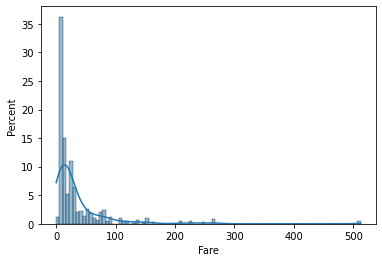

In [38]:
sns.histplot(titanic["Fare"], kde=True, stat="percent")
plt.show()

<p>Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it.  In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram.  If you're interested in learning about how KDE works, you can read more on <a target="_blank" href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Wikipedia</a>.  </p>

<p>What you need to know for now is that the resulting line is a smoother version of the histogram, called a <strong>kernel density plot</strong>.  Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission.  When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.</p>

> - Import seaborn as sns and matplotlib.pyplot as plt.
- Use the seaborn.histplot() function to visualize the distribution of the "Age" column.
- Display the plot using plt.show().

/home/icta/python-analitika/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


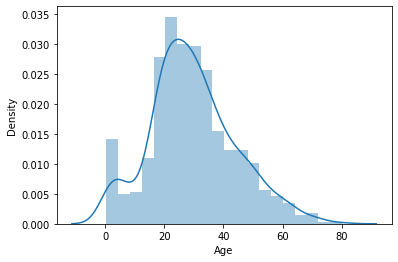

In [39]:
sns.distplot(titanic['Age'])
plt.show()

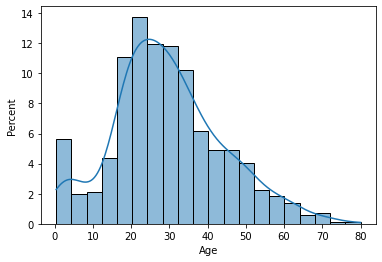

In [44]:
sns.histplot(titanic["Age"], kde=True, stat="percent")
plt.show()

### Generating A Kernel Density Plot

<div><p>While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution.  To generate just the kernel density plot, we use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot"><code>seaborn.kdeplot()</code></a> function:</p>
</div>

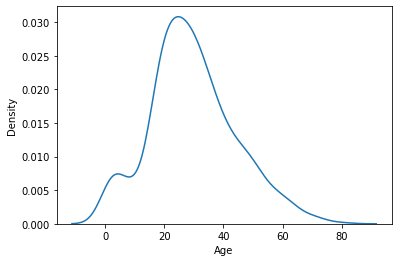

In [45]:
sns.kdeplot(titanic["Age"])
plt.show()

<p>While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart.  When we also had the histogram, the bars provided a way to understand and compare proportions visually.</p>

<p>To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color.  When calling the <code>seaborn.kdeplot()</code> function, we can shade the area under the line by setting the <code>shade</code> parameter to <code>True</code>.</p>

> - Generate a kernel density plot:
    - Using the values in the "Age" column
    - With the area under the curve shaded
- Set the x-axis label to "Age" using pyplot.xlabel().

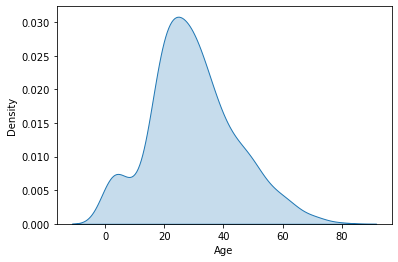

In [47]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

### Modifying The Appearance Of The Plots

<div><p>From the plots in the previous step, you'll notice that seaborn:</p>
<ul>
<li>Sets the x-axis label based on the column name passed through <code>plt.xlabel()</code> function</li>
<li>Sets the background color to a light gray color</li>
<li>Hides the x-axis and y-axis ticks</li>
<li>Displays the coordinate grid</li>
</ul>
<p>In the last few missions, we explored some general aesthetics guidelines for plots.  The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines.  We can use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style"><code>seaborn.set_style()</code></a> function to change the default seaborn style sheet.  Seaborn comes with a few style sheets:</p>
<ul>
<li><code>darkgrid</code>: Coordinate grid displayed, dark background color</li>
<li><code>whitegrid</code>: Coordinate grid displayed, white background color</li>
<li><code>dark</code>: Coordinate grid hidden, dark background color</li>
<li><code>white</code>: Coordinate grid hidden, white background color</li>
<li><code>ticks</code>: Coordinate grid hidden, white background color, ticks visible</li>
</ul>
<p>Here's a diagram that compares the same plot across all styles:</p>
<p><img alt="Seaborn All Styles" src="images/seaborn_all_styles.png"></p>
<p>By default, the seaborn style is set to <code>"darkgrid"</code>:</p>
</div>

    sns.set_style("darkgrid")

<div>
<p>If we change the style sheet using this method, all future plots will match that style in your current session.  This means you need to set the style before generating the plot. </p>
<p>To remove the axis spines for the top and right axes, we use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine"><code>seaborn.despine()</code></a> function:</p>
</div>

    sns.despine()

<div>
<p>By default, only the top and right axes will be <strong>despined</strong>, or have their spines removed.  To despine the other two axes, we need to set the <code>left</code> and <code>bottom</code> parameters to <code>True</code>.</p></div>

> - Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
- Set the x-axis label to "Age".
- Despine all of the axes.

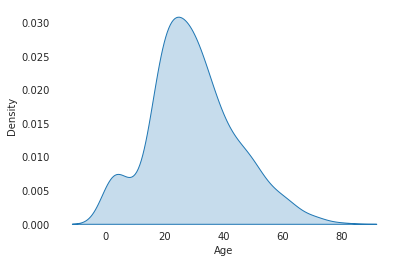

In [48]:
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')
plt.show()

### Conditional Plots

<div><p>In the last few missions, we created a <a target="_blank" href="https://en.wikipedia.org/wiki/Small_multiple">small multiple</a>, which is a group of plots that have the same axis scales so the viewer can compare plots effectively.  We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.</p>
<p>In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want.  For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots.  One kernel density plot would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>0</code> and the other would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>1</code>.</p>
<p>Here's what those plots look like:</p>
<p><img alt="Simple Conditional KDE Plot" src="images/seaborn_simple_conditional.png"></p>
<p>The code to generate the pair of plots, is short and sweet:</p>
</div>

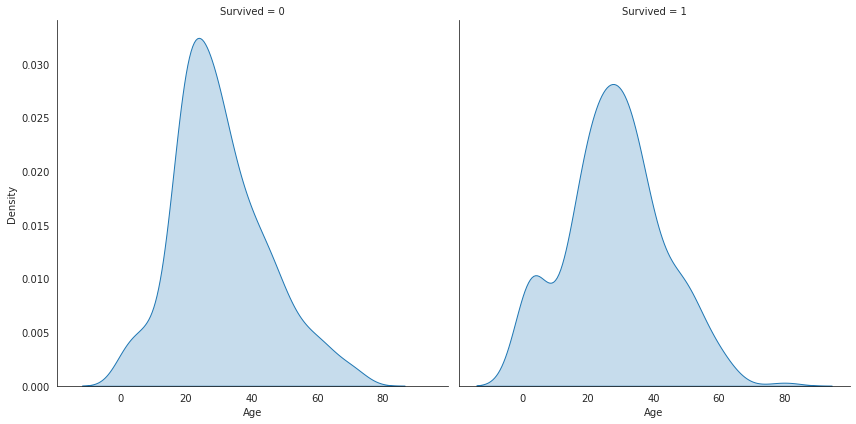

In [49]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
plt.show()

<div>
<p>Seaborn handled:</p>
<ul>
<li>subsetting the data into rows where <code>Survived</code> is <code>0</code> and where <code>Survived</code> is <code>1</code></li>
<li>creating both Axes objects, ensuring the same axis scales</li>
<li>plotting both kernel density plots</li>
</ul>
<p>Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values.  The <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid"><code>seaborn.FacetGrid</code></a> object is used to represent the layout of the plots in the grid and the columns used for subsetting the data.  The word "facet" from <code>FacetGrid</code> is another word for "subset".  Setting the <code>col</code> parameter to <code>"Survived"</code> specifies a separate plot for each unique value in the <code>Survived</code> column.  Setting the <code>hight</code> parameter to <code>6</code> specifies a height of 6 inches for each plot.</p>
<p>Once we've created the grid, we use the <code>FacetGrid.map()</code> method to specify the plot we want for each unique value of <code>Survived</code>.  Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.</p>
<p>The function that's passed into <code>FacetGrid.map()</code> has to be a valid matplotlib or seaborn function.  For example, we can map matplotlib histograms to the grid:</p>
</div>

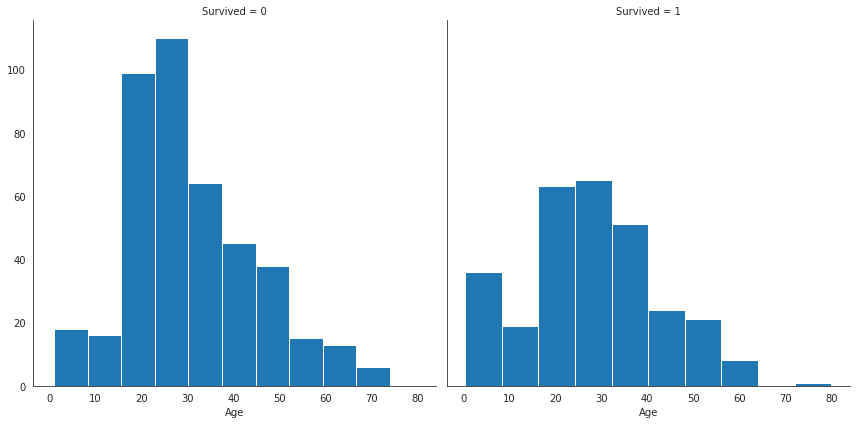

In [50]:
g = sns.FacetGrid(titanic, col="Survived", height=6)
g.map(plt.hist, "Age")
plt.show()

Let's create a grid of plots that displays the age distributions for each class.

> - Use a FacetGrid instance to generate three plots on the same row:
    - One for each unique value of Pclass.
    - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    - Each plot should have a height of 6 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

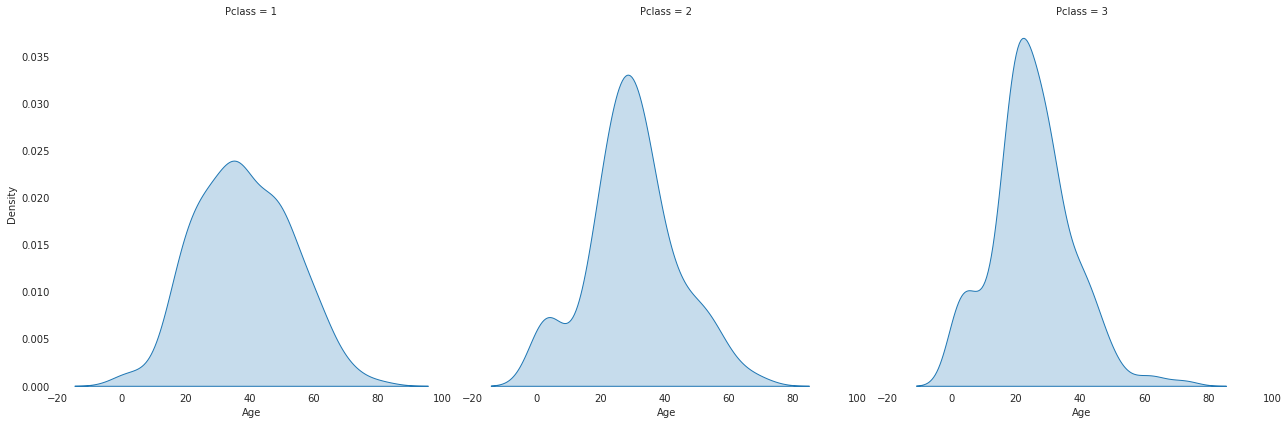

In [51]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

<div><p>We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition.  When creating a <code>FacetGrid</code>, we use the <code>row</code> parameter to specify the column in the dataframe we want used to subset across the rows in the grid.  The best way to understand this is to see a working example.</p>
<p>The starter code subsets the dataframe on different combinations of unique values in both the <code>Pclass</code> and <code>Survived</code> columns.  Try changing the conditions to see the resulting plots.</p></div>

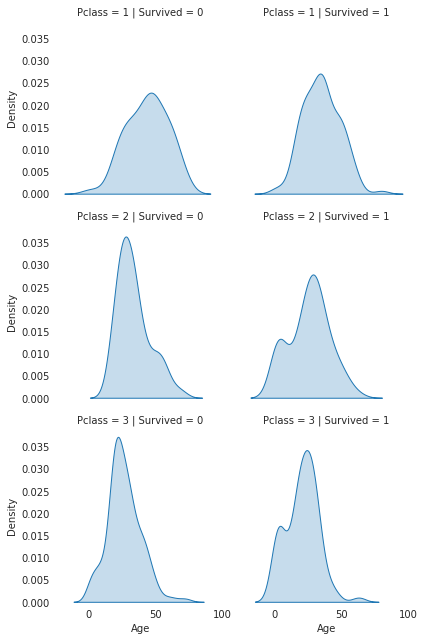

In [52]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

<div><p>When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another.  We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently.  Thankfully, we can add a condition just by setting the <code>hue</code> parameter to the column name from the dataframe.</p>
<p>Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.</p></div>

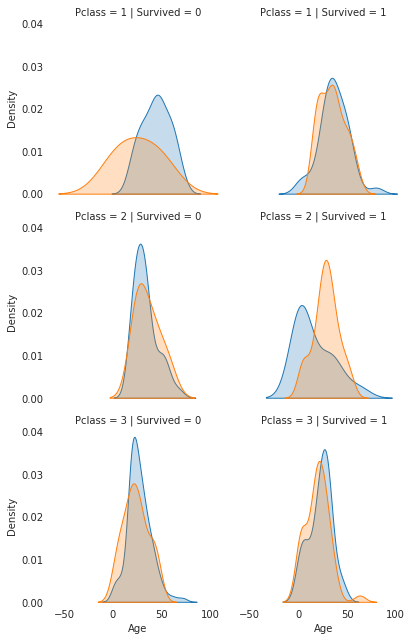

In [53]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

###  Adding A Legend

<div><p>Now that we're coloring plots, we need a legend to keep track of which value each color represents.  As a challenge to you, we won't specify how exactly to generate a legend in seaborn.  Instead, we encourage you to use the examples from  the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid">page</a> on plotting using the <code>FacetGrid</code> instance.</p>
<p>Here's what we want the final grid to look like:</p>
<p><img alt="Seaborn Three Conditions" src="images/seaborn_three_conditions.png"></p></div>

> - Use a FacetGrid instance to generate a grid of plots using the following conditions:
    - The Survived column across the columns in the grid.
    - The Pclass column across the rows in the grid.
    - The Sex column using different hues.
- Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
- Each plot should have a height of 3 inches.
- Remove all of the spines using seaborn.despine().
- Add a legend for the hues representing the values in the Sex column.
    - Make sure that you add your legend after despining.
- Display the plots.

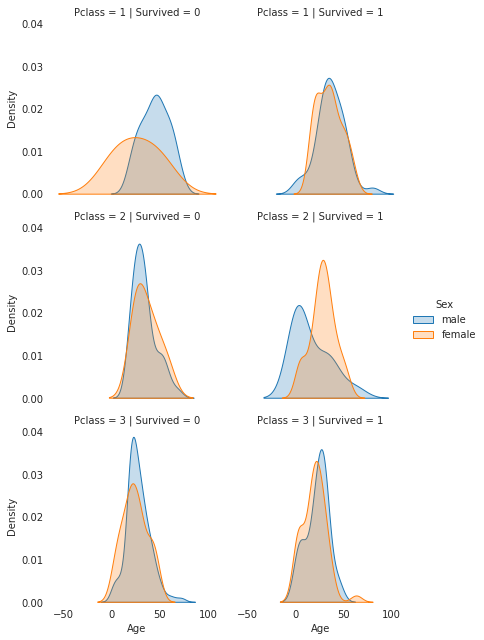

In [54]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
g.add_legend()
plt.show()